# Paragraph clean

Remove very noisy paragraphs, i.e. v short, v long and duplicates within a patent

Saved 73986 documents to coarse_cleaned_patents_filtered_dedup_para.jsonl


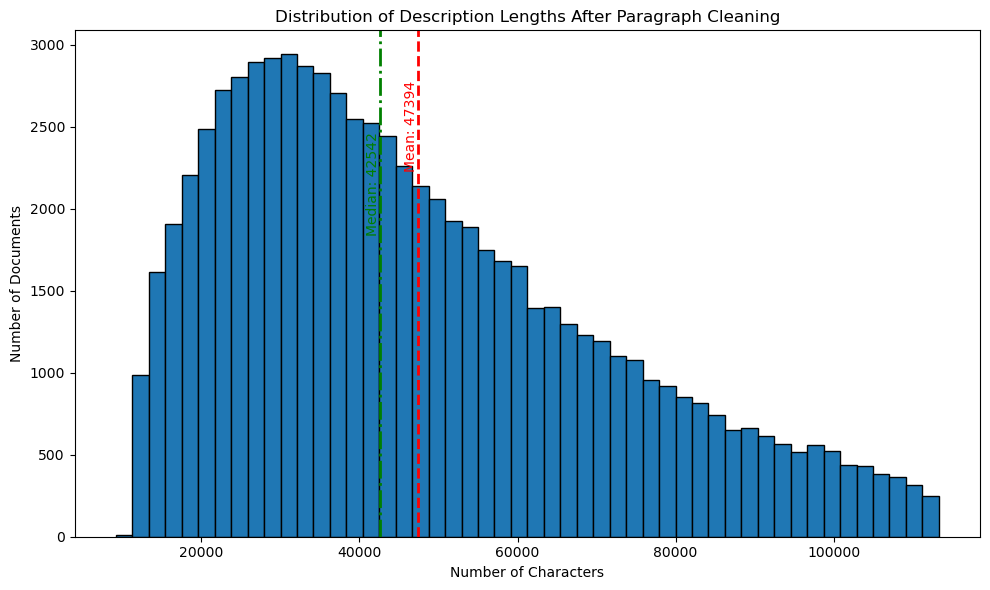

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

input_file = "coarse_cleaned_patents_filtered_dedup.jsonl"
output_file = "coarse_cleaned_patents_filtered_dedup_para.jsonl"

# thresholds for paragraph cleaning
min_len = 40
max_len = 10240 # 512 (seq_len) x 5 (approx chars per token) x 4 (assuming a max compression of around 1:4) 

cleaned_records = []
desc_lengths = []

with open(input_file, "r", encoding="utf-8") as fin, open(output_file, "w", encoding="utf-8") as fout:
    for line in fin:
        doc = json.loads(line)

        # split description into paragraphs
        paras = [p.strip() for p in doc["description"].split("\n\n") if p.strip()]

        # filter by length
        paras = [p for p in paras if min_len <= len(p) <= max_len]

        # drop exact duplicates while preserving order
        seen = set()
        unique_paras = []
        for p in paras:
            if p not in seen:
                unique_paras.append(p)
                seen.add(p)

        # reassemble description
        new_desc = "\n\n".join(unique_paras)

        # update doc
        new_doc = {
            "description": new_desc,
            "claim1": doc["claim1"]
        }
        fout.write(json.dumps(new_doc, ensure_ascii=False) + "\n")
        cleaned_records.append(new_doc)

        # track description lengths
        desc_lengths.append(len(new_desc))

print(f"Saved {len(cleaned_records)} documents to {output_file}")

# --- plot distribution of description lengths ---
if desc_lengths:
    avg = np.mean(desc_lengths)
    median = np.median(desc_lengths)

    plt.figure(figsize=(10,6))
    plt.hist(desc_lengths, bins=50, edgecolor="black")

    plt.axvline(avg, color="red", linestyle="--", linewidth=2)
    plt.axvline(median, color="green", linestyle="-.", linewidth=2)

    plt.text(avg, plt.ylim()[1]*0.9, f"Mean: {avg:.0f}", color="red", rotation=90, va="top", ha="right")
    plt.text(median, plt.ylim()[1]*0.8, f"Median: {median:.0f}", color="green", rotation=90, va="top", ha="right")

    plt.title("Distribution of Description Lengths After Paragraph Cleaning")
    plt.xlabel("Number of Characters")
    plt.ylabel("Number of Documents")
    plt.tight_layout()
    plt.show()
else:
    print("No descriptions found after cleaning.")


In [2]:
from datasets import load_dataset

# Load the JSONL file
dataset = load_dataset("json", data_files="coarse_cleaned_patents_filtered_dedup_para.jsonl")

dataset = dataset["train"]

# Push to Hugging Face Hub
dataset.push_to_hub("mhurhangee/ep-patents-coarse-cleaned",commit_message="with removing very short and very long paragraphs")

Generating train split: 0 examples [00:00, ? examples/s]

Uploading the dataset shards:   0%|          | 0/8 [00:00<?, ? shards/s]

Creating parquet from Arrow format:   0%|          | 0/10 [00:00<?, ?ba/s]

Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

                                        :   0%|          |  502kB /  161MB            

Creating parquet from Arrow format:   0%|          | 0/10 [00:00<?, ?ba/s]

Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

                                        :   1%|          | 1.09MB /  158MB            

Creating parquet from Arrow format:   0%|          | 0/10 [00:00<?, ?ba/s]

Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

                                        :   0%|          |  358kB /  161MB            

Creating parquet from Arrow format:   0%|          | 0/10 [00:00<?, ?ba/s]

Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

                                        :   0%|          |  305kB /  161MB            

Creating parquet from Arrow format:   0%|          | 0/10 [00:00<?, ?ba/s]

Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

                                        :   0%|          |  280kB /  158MB            

Creating parquet from Arrow format:   0%|          | 0/10 [00:00<?, ?ba/s]

Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

                                        :   1%|          | 1.22MB /  158MB            

Creating parquet from Arrow format:   0%|          | 0/10 [00:00<?, ?ba/s]

Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

                                        :   0%|          |  608kB /  161MB            

Creating parquet from Arrow format:   0%|          | 0/10 [00:00<?, ?ba/s]

Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

                                        :   0%|          |  363kB /  161MB            

README.md: 0.00B [00:00, ?B/s]

CommitInfo(commit_url='https://huggingface.co/datasets/mhurhangee/ep-patents-coarse-cleaned/commit/b5d79859982a4e522fbf9898c5e8410e4ac53593', commit_message='with removing very short and very long paragraphs', commit_description='', oid='b5d79859982a4e522fbf9898c5e8410e4ac53593', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/mhurhangee/ep-patents-coarse-cleaned', endpoint='https://huggingface.co', repo_type='dataset', repo_id='mhurhangee/ep-patents-coarse-cleaned'), pr_revision=None, pr_num=None)